# Excercise A

Data la matrice, calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

In [1]:
from scipy.linalg import lu, lu_solve, lu_factor
import numpy as np

A = np.array(
    [
        [4.5, 1.0, 3.0, 2.0],
        [1.0, -8.0, 2.0, 1.0],
        [-1.0, -2.0, -3.0, -1.0],
        [2.0, 6.0, 0, 1.0],
    ]
)

P, L, U = lu(A)

# === Calcolo determinante con LU ===
# det(A) = det(P) * det(L) * det(U)
# - det(P) è ±1 (permute matrix → +1 se permutazione pari, -1 se dispari)
# - det(L) = 1 perché triangolare inferiore con diagonale 1
# - det(U) = prodotto degli elementi diagonali di U
det_P = np.linalg.det(P)
det_U = np.prod(np.diag(U))
det_LU = det_P * det_U
print("\nDeterminante con LU:", det_LU)

det_direct = np.linalg.det(A)
print("Determinante con numpy.linalg.det:", det_direct)

# === Calcolo inversa risolvendo n sistemi ===
n = A.shape[0]
inv_A = np.zeros_like(A)
lu_fatt, piv = lu_factor(A)

for i in range(n):
    e = np.zeros(n)
    e[i] = 1
    inv_A[:, i] = lu_solve((lu_fatt, piv), e)

# Confronto con numpy.linalg.inv
inv_numpy = np.linalg.inv(A)

print("\nInversa calcolata con LU:")
print(inv_A)

print("\nInversa calcolata con numpy.linalg.inv:")
print(inv_numpy)

# Verifica accuratezza
diff = np.linalg.norm(inv_A - inv_numpy)
print("\nDifferenza tra le due inverse (norma):", diff)


Determinante con LU: 58.00000000000001
Determinante con numpy.linalg.det: 57.999999999999986

Inversa calcolata con LU:
[[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]

Inversa calcolata con numpy.linalg.inv:
[[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]

Differenza tra le due inverse (norma): 0.0


# Excercise A1

Data La matrice, dire se esiste la fattorizzaione LU senza pivotaggio a perno massimo, verificando le ipotesi del teorema di esistenza della fattorizzazione LU

$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

In [2]:
import numpy as np

A = np.array([[4.5, 1, 3, 2], [1, -8, 2, 1], [-1, -2, -3, -1], [2, 6, 0, 1]])

# Calcoliamo i determinanti dei principali minori
det_A1 = A[0, 0]
det_A2 = np.linalg.det(A[:2, :2])
det_A3 = np.linalg.det(A[:3, :3])
det_A4 = np.linalg.det(A)

print("[DET1]", det_A1)
print("[DET2]", det_A2)
print("[DET3]", det_A3)
print("[DET4]", det_A4)

# se i determinanti sono non nulli, ammette la fattorizzazione LU senza pivottaggio.

[DET1] 4.5
[DET2] -37.0
[DET3] 97.0
[DET4] 57.999999999999986


# Excercise A2
Data la matrice, dire se ammette fattorizzaione di Cholesky, verificando le ipotesi del teorema di Cholesky     
    
    A = np.array([[21.0, 37.0, 57.5], [37.0, 94.0, 72.5], [57.5, 72.5, 186.25]])

In [3]:
import numpy as np

A = np.array([[21.0, 37.0, 57.5], [37.0, 94.0, 72.5], [57.5, 72.5, 186.25]])

print("simmetica?", np.allclose(A, A.T))
print("positiva?", np.all(np.linalg.eigvals(A) > 0))
print("condizionamento:", np.linalg.cond(A))

# è positiva e simmetrica, ciò significa che choleski è applicabile, ma è mal condizionata
# il che porta ad instabilità o errori numerici, e al fallimento della fattorizzazione

simmetica? True
positiva? True
condizionamento: 1.008011784061425e+16


# Excercise B
 - Implementare la function  per il calcolo del polinomio interpolatore di Lagrange
 - Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$ dove $x_i,i=0,4$ sono punti equidistanti nell' intervallo [-2,2] e $y_i=f(x_i)$ dove $f(x)=5x^4+2x^2+2x-1$ 
 - Visualizzare il polinomio interpolatore, i nodi dell'interpolazione
 - Visualizzare l'errore assoluto tra il polinomio interpolatore e la funzione che ha generato i dati
 - Commentare i risultati alla luce della teoria.


In [4]:
import numpy as np


def plagr(xnodi, j):
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size

    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j + 1 : n])

    # Calcola i coefficienti del polinomio di grado n che si annulla nel vettore xzeri
    num = np.poly(xzeri)
    # Lo valuta nel nodo escluso (-jesimo)
    den = np.polyval(num, xnodi[j])

    return num / den


def InterpL(x, y, xx):
    n = x.size
    m = xx.size

    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xx)

    return L @ y

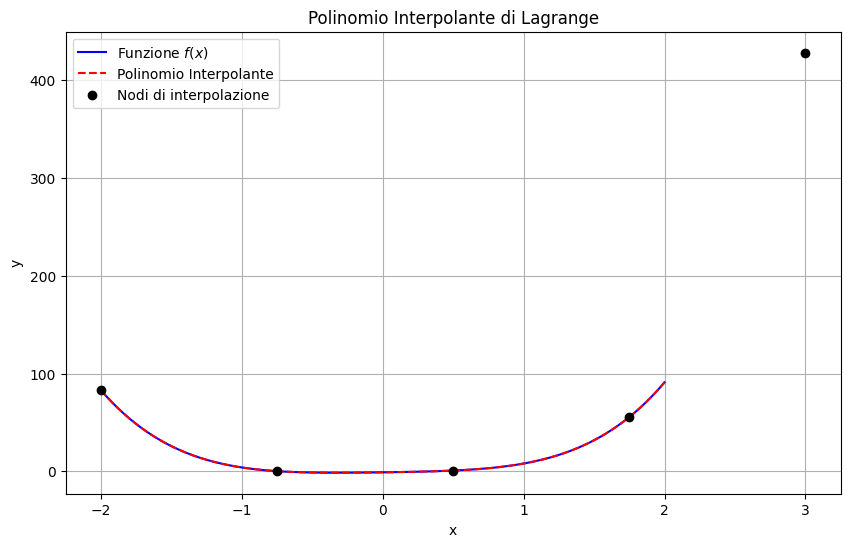

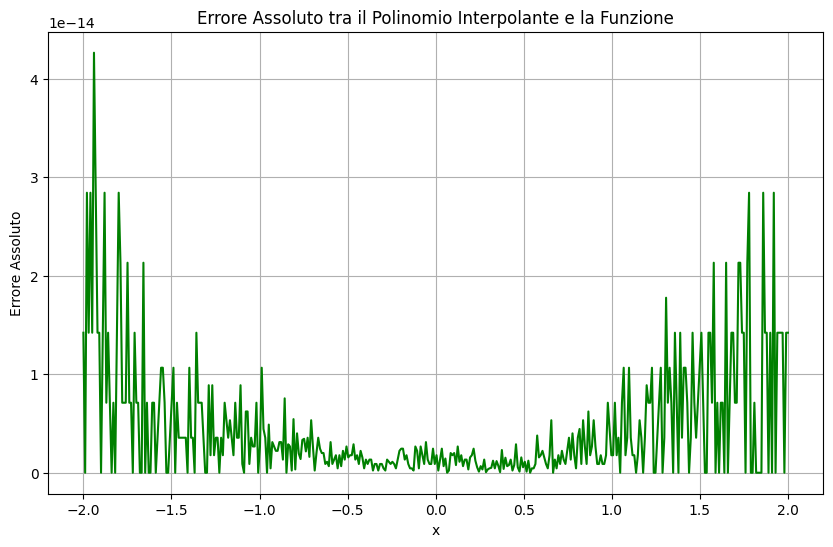

In [5]:
import matplotlib.pyplot as plt

f = lambda x: 5 * x**4 + 2 * x**2 + 2 * x - 1
x = np.linspace(-2, 3, 5)
y = f(x)

xx = np.linspace(-2, 2, 400)
yy = f(xx)

y_interp = InterpL(x, y, xx)

error = np.abs(yy - y_interp)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Funzione $f(x)$", color="blue")
plt.plot(xx, y_interp, label="Polinomio Interpolante", color="red", linestyle="--")
plt.scatter(x, y, color="black", zorder=5, label="Nodi di interpolazione")

plt.title("Polinomio Interpolante di Lagrange")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(xx, error, label="Errore Assoluto", color="green")

plt.title("Errore Assoluto tra il Polinomio Interpolante e la Funzione")
plt.xlabel("x")
plt.ylabel("Errore Assoluto")
plt.grid(True)

plt.show()

# Excercise C
Per i dati $(x_i, y_i)$ riportati nei seguenti array
    
    x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 
    y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

 - costruire la retta di regressione;
 - costruire la parabola approssimante i dati nel senso dei minimi quadrati;
 - determinare l'approssimazione ai minimi quadrati espressa in termini di basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

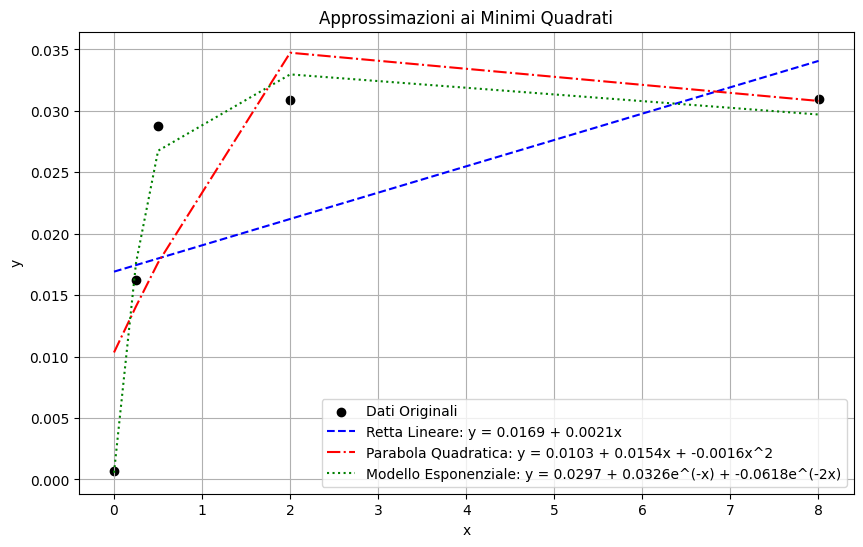

Norma Euclidea al quadrato per il modello lineare: 0.000485
Norma Euclidea al quadrato per il modello quadratico: 0.000236
Norma Euclidea al quadrato per il modello esponenziale: 0.000012


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dati
x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
y = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])


# 1. Regressione lineare: y = a + bx
def linear_model(x, a, b):
    return a + b * x


# 2. Regressione quadratica: y = a + bx + cx^2
def quadratic_model(x, a, b, c):
    return a + b * x + c * x**2


# 3. Regressione con basi esponenziali: y = a + b*e^(-x) + c*e^(-2x)
def exponential_model(x, a, b, c):
    return a + b * np.exp(-x) + c * np.exp(-2 * x)


# Fit lineare
params_linear, _ = curve_fit(linear_model, x, y)

# Fit quadratico
params_quadratic, _ = curve_fit(quadratic_model, x, y)

# Fit esponenziale
params_exponential, _ = curve_fit(exponential_model, x, y)

# Calcolo delle approssimazioni
y_linear = linear_model(x, *params_linear)
y_quadratic = quadratic_model(x, *params_quadratic)
y_exponential = exponential_model(x, *params_exponential)

# Calcolo dei residui e della norma euclidea al quadrato
residuals_linear = y - y_linear
residuals_quadratic = y - y_quadratic
residuals_exponential = y - y_exponential

norm_squared_linear = np.sum(residuals_linear**2)
norm_squared_quadratic = np.sum(residuals_quadratic**2)
norm_squared_exponential = np.sum(residuals_exponential**2)

# Plot dei risultati
plt.figure(figsize=(10, 6))

# Dati originali
plt.scatter(x, y, color="black", label="Dati Originali")

# Modello lineare
plt.plot(
    x,
    y_linear,
    label=f"Retta Lineare: y = {params_linear[0]:.4f} + {params_linear[1]:.4f}x",
    color="blue",
    linestyle="--",
)

# Modello quadratico
plt.plot(
    x,
    y_quadratic,
    label=f"Parabola Quadratica: y = {params_quadratic[0]:.4f} + {params_quadratic[1]:.4f}x + {params_quadratic[2]:.4f}x^2",
    color="red",
    linestyle="-.",
)

# Modello esponenziale
plt.plot(
    x,
    y_exponential,
    label=f"Modello Esponenziale: y = {params_exponential[0]:.4f} + {params_exponential[1]:.4f}e^(-x) + {params_exponential[2]:.4f}e^(-2x)",
    color="green",
    linestyle=":",
)

# Aggiungi legende, etichette e titolo
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Approssimazioni ai Minimi Quadrati")
plt.grid(True)

# Mostra il grafico
plt.show()

# Stampa delle norme euclidee al quadrato
print(f"Norma Euclidea al quadrato per il modello lineare: {norm_squared_linear:.6f}")
print(
    f"Norma Euclidea al quadrato per il modello quadratico: {norm_squared_quadratic:.6f}"
)
print(
    f"Norma Euclidea al quadrato per il modello esponenziale: {norm_squared_exponential:.6f}"
)

# fra i tre modelli risulta migliore il modello esponenziale, quindi si nota che i dati seguono una crescita esponenziale

# Excercise D
La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

    L   [-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65]

    T   [3.7, 3., 3.52, 3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 

Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°). 
Mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).

Descrivere i risultati alla luce della teoria.

In [7]:
import numpy as np


def plagr(xnodi, j):
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size

    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j + 1 : n])

    # Calcola i coefficienti del polinomio di grado n che si annulla nel vettore xzeri
    num = np.poly(xzeri)
    # Lo valuta nel nodo escluso (-jesimo)
    den = np.polyval(num, xnodi[j])

    return num / den


def InterpL(x, y, xx):
    n = x.size
    m = xx.size

    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xx)

    return L @ y

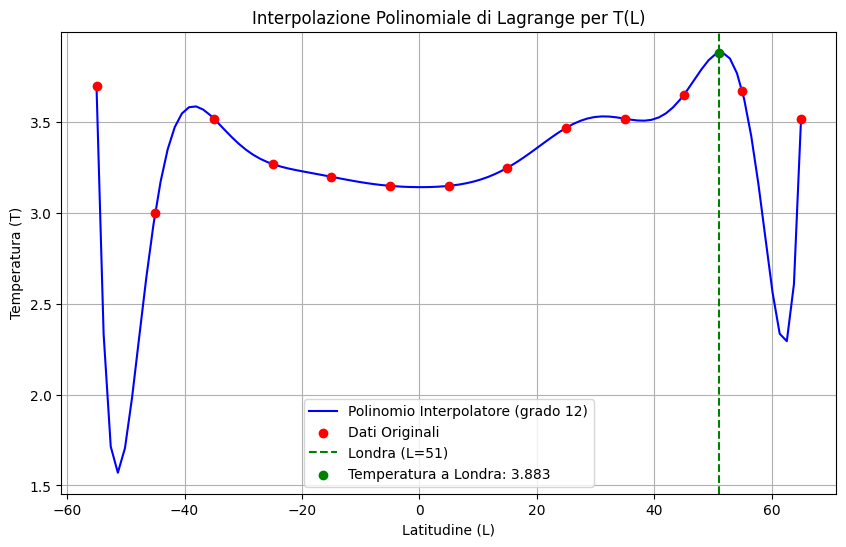

La temperatura a Londra (L=51°) è: 3.883°C


In [8]:
import numpy as np
import matplotlib.pyplot as plt

L = np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])  # latitudini
T = np.array(
    [3.7, 3.0, 3.52, 3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52]
)  # temperature

# Latitudini equidistanti per la visualizzazione del polinomio
L_fine = np.linspace(min(L), max(L), 100)

# Calcoliamo il polinomio di Lagrange per tutte le latitudini
T_fine = InterpL(L, T, L_fine)

# Calcolo della temperatura per L = 51 (Londra)
T_londra = InterpL(L, T, np.array([51]))

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(L_fine, T_fine, label="Polinomio Interpolatore (grado 12)", color="blue")
plt.scatter(L, T, color="red", zorder=5, label="Dati Originali")
plt.axvline(x=51, color="green", linestyle="--", label="Londra (L=51)")
plt.scatter(
    51,
    T_londra,
    color="green",
    zorder=5,
    label=f"Temperatura a Londra: {T_londra[0]:.3f}",
)

plt.xlabel("Latitudine (L)")
plt.ylabel("Temperatura (T)")
plt.title("Interpolazione Polinomiale di Lagrange per T(L)")
plt.legend()
plt.grid(True)

plt.show()

# Risultato per Londra
print(f"La temperatura a Londra (L=51°) è: {T_londra[0]:.3f}°C")

## Excercise E

 - Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
Risolvere il sistema di equazioni non lineare, con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$

 - Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]

In [9]:
import numpy as np


def newton_raphson(
    initial_guess, F_numerical, J_Numerical, max_it=100, tolX=1e-12, tolF=1e-12
):
    X = np.array(initial_guess, dtype=float)
    erroreF = 1 + tolF
    erroreX = 1 + tolX
    er = []
    while len(er) < max_it and erroreX >= tolX and erroreF >= tolF:
        jx = J_Numerical(*X)
        if np.linalg.det(jx) == 0:
            print(
                "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
            )
            return None, None, None

        fx = F_numerical(*X).squeeze()
        s = np.linalg.solve(jx, -fx)
        X = X + s
        norma = np.linalg.norm(X, 1)

        if norma != 0:
            erroreX = np.linalg.norm(s, 1) / norma
        else:
            erroreX = np.linalg.norm(s, 1)

        erroreF = np.linalg.norm(F_numerical(*X).squeeze(), 1)
        er.append(erroreX)

    return X, er, len(er)


def newton_raphson_corde(
    initial_guess, F_numerical, J_Numerical, max_it=100, tolX=1e-12, tolF=1e-12
):
    X = np.array(initial_guess, dtype=float)
    erroreF = 1 + tolF
    erroreX = 1 + tolX
    er = []
    while len(er) < max_it and erroreX >= tolX and erroreF >= tolF:
        if len(er) == 0:
            jx = J_Numerical(*X)
            if np.linalg.det(jx) == 0:
                print(
                    "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
                )
                return None, None, None

        fx = F_numerical(*X).squeeze()
        s = np.linalg.solve(jx, -fx)
        X = X + s
        norma = np.linalg.norm(X, 1)

        if norma != 0:
            erroreX = np.linalg.norm(s, 1) / norma
        else:
            erroreX = np.linalg.norm(s, 1)

        erroreF = np.linalg.norm(F_numerical(*X).squeeze(), 1)
        er.append(erroreX)

    return X, er, len(er)


def newton_raphson_sham(
    initial_guess, update, F_numerical, J_Numerical, max_it=100, tolX=1e-12, tolF=1e-12
):
    X = np.array(initial_guess, dtype=float)
    erroreF = 1 + tolF
    erroreX = 1 + tolX
    er = []
    while len(er) < max_it and erroreX >= tolX and erroreF >= tolF:
        if len(er) % update == 0:
            jx = J_Numerical(*X)
            if np.linalg.det(jx) == 0:
                print(
                    "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
                )
                return None, None, None

        fx = F_numerical(*X).squeeze()
        s = np.linalg.solve(jx, -fx)
        X = X + s
        norma = np.linalg.norm(X, 1)

        if norma != 0:
            erroreX = np.linalg.norm(s, 1) / norma
        else:
            erroreX = np.linalg.norm(s, 1)

        erroreF = np.linalg.norm(F_numerical(*X).squeeze(), 1)
        er.append(erroreX)

    return X, er, len(er)

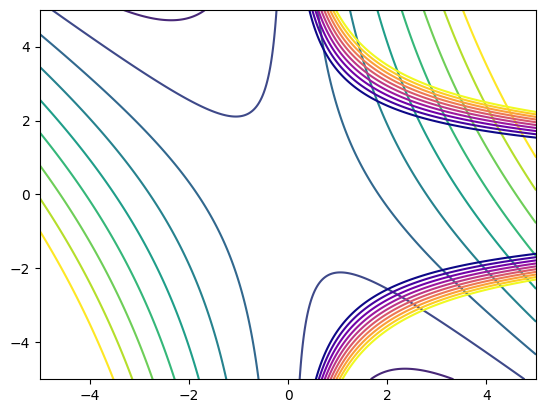

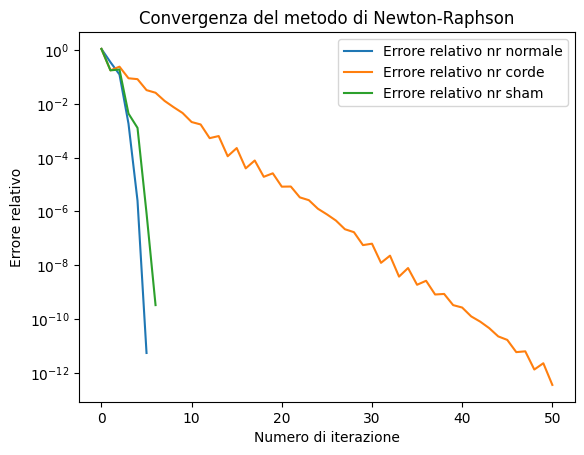

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

x0, x1 = sym.symbols("x0 x1")

f1 = x0**2 + x0 * x1 - 10
f2 = x1 + 3 * x0 * x1**2 - 57

F_symbolic = sym.Matrix([f1, f2])

J_symbolic = F_symbolic.jacobian([x0, x1])

J_func = sym.lambdify([x0, x1], J_symbolic, 'numpy')
F_func = sym.lambdify([x0, x1], F_symbolic, 'numpy')

x0_vals = np.linspace(-5, 5, 400)
x1_vals = np.linspace(-5, 5, 400)
X0, X1 = np.meshgrid(x0_vals, x1_vals)

F1_func = sym.lambdify([x0, x1], f1, 'numpy')
F2_func = sym.lambdify([x0, x1], f2, 'numpy')

F1_vals = F1_func(X0, X1)
F2_vals = F2_func(X0, X1)

plt.contour(X0, X1, F1_vals, levels=np.linspace(-20, 20, 10), cmap='viridis')
plt.contour(X0, X1, F2_vals, levels=np.linspace(-20, 20, 10), cmap='plasma')
plt.show()

initial_guess = [1.0, 5.0]
X1, errore_1, iterazioni_1 = newton_raphson(initial_guess, F_func, J_func)
X2, errore_2, iterazioni_2 = newton_raphson_corde(initial_guess, F_func, J_func)
X3, errore_3, iterazioni_3 = newton_raphson_sham(initial_guess, 2, F_func, J_func)

plt.semilogy(range(iterazioni_1), errore_1, label="Errore relativo nr normale")
plt.semilogy(range(iterazioni_2), errore_2, label="Errore relativo nr corde")
plt.semilogy(range(iterazioni_3), errore_3, label="Errore relativo nr sham")
plt.xlabel("Numero di iterazione")
plt.ylabel("Errore relativo")
plt.title("Convergenza del metodo di Newton-Raphson")
plt.legend()
plt.show()

# per trovare un minimo anzichè uno zero, con newton rapshon si applica il grafiente della funzione = 0
# con aggiornamento x(k + 1) = x(k) - H(xk)^(-1) * il gradiente(xk)
# H è la matriche Heissiana.

# Newton-Raphson raggiunge la soglia di errore in meno iterazioni.
# Shamanskii è nel mezzo: curva simile a Newton all'inizio, ma rallenta.
# Le corde convergono più lentamente: curva più piatta.